In [40]:
import findspark
findspark.init()

import pyspark
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
from datetime import date
import numpy as np 
import pandas as pd
from pandas import DataFrame
from pyspark.sql.functions import udf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [41]:
def tx_date(s):
    x = date.fromtimestamp(s)
    return x


In [42]:
spark = SparkSession.builder \
                    .master("local") \
                    .config("spark.driver.memory", "8g") \
                    .getOrCreate()
spark.conf.set("spark.executor.memory", "8g")

sc = spark.sparkContext
sqlContext = SQLContext(sc)

df = sqlContext.read.parquet('E:\\0.parquet')
df = df.toPandas()


In [43]:
#df = df.head(10)
#print(df)

received_time = []
for i in df.iloc[:,3]:
    received_time.append(tx_date(i).strftime("%Y-%m-%d"))
df['date'] = received_time
print(df['date'])


0         2017-09-26
1         2017-09-26
2         2017-09-26
3         2017-09-26
4         2017-09-26
5         2017-09-26
6         2017-09-26
7         2017-09-26
8         2017-09-26
9         2017-09-26
10        2017-09-26
11        2017-09-26
12        2017-09-26
13        2017-09-26
14        2017-09-26
15        2017-09-26
16        2017-09-26
17        2017-09-26
18        2017-09-26
19        2017-09-26
20        2017-09-26
21        2017-09-26
22        2017-09-26
23        2017-09-26
24        2017-09-26
25        2017-09-26
26        2017-09-26
27        2017-09-26
28        2017-09-26
29        2017-09-26
             ...    
245477    2017-09-26
245478    2017-09-26
245479    2017-09-26
245480    2017-09-26
245481    2017-09-26
245482    2017-09-26
245483    2017-09-26
245484    2017-09-26
245485    2017-09-26
245486    2017-09-26
245487    2017-09-26
245488    2017-09-26
245489    2017-09-26
245490    2017-09-26
245491    2017-09-26
245492    2017-09-26
245493    201

In [44]:
vin = []
for i in df['vin']:
    vin.append(len(i))
vout = []
for i in df['vout']:
    vout.append(len(i))


pf = pd.DataFrame([vin,vout], index = ['inputn','outputn']).transpose()
print(pf)

pf1 = pd.DataFrame([df['date'],pf['inputn'],pf['outputn']], index = ['date','inNum','outNum']).transpose()
print(pf1)


        inputn  outputn
0            1        2
1            1        2
2            1        2
3           10        1
4            1        2
5            1        2
6            6        2
7            2        2
8            1        2
9           15        1
10           1        2
11           1        2
12           1        2
13           2        2
14           1        2
15           1        2
16           1        2
17           1        2
18           1        2
19           1        2
20           7        2
21           1        2
22           1        2
23           1        1
24           1        1
25          12        1
26           2        2
27           2        2
28           1        2
29           4        2
...        ...      ...
245477       3        2
245478       3        2
245479       3        2
245480       2        2
245481       3        2
245482       2        2
245483       2        2
245484       3        2
245485       2        2
245486       1  

In [45]:
pf2 = pf1.groupby(['date']).sum()
print(pf2)


             inNum  outNum
date                      
2017-09-24   36317   35081
2017-09-25  204672  236867
2017-09-26  342145  357650
2017-09-27   29744   30588


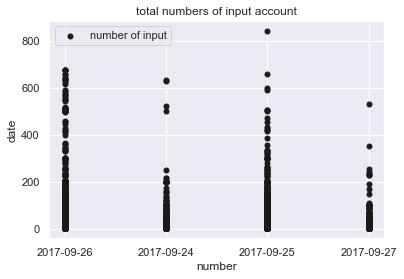

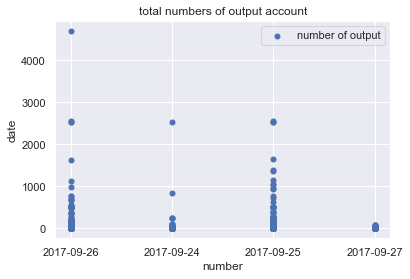

In [48]:

plt.scatter(pf1['date'],pf1['inNum'], label='number of input', color='k', s=25, marker="o")
plt.xlabel('number')
plt.ylabel('date')
plt.title('total numbers of input account')
plt.legend()
plt.show()

plt.scatter(pf1['date'],pf1['outNum'], label='number of output', color='b', s=25, marker="o")
plt.xlabel('number')
plt.ylabel('date')
plt.title('total numbers of output account')
plt.legend()
plt.show()